In [1]:
from MPU6050 import MPU6050
from CAP11NA import CAP11NA
from BM1422 import BM1422

accel = MPU6050(time_step=1, duration=1500, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)


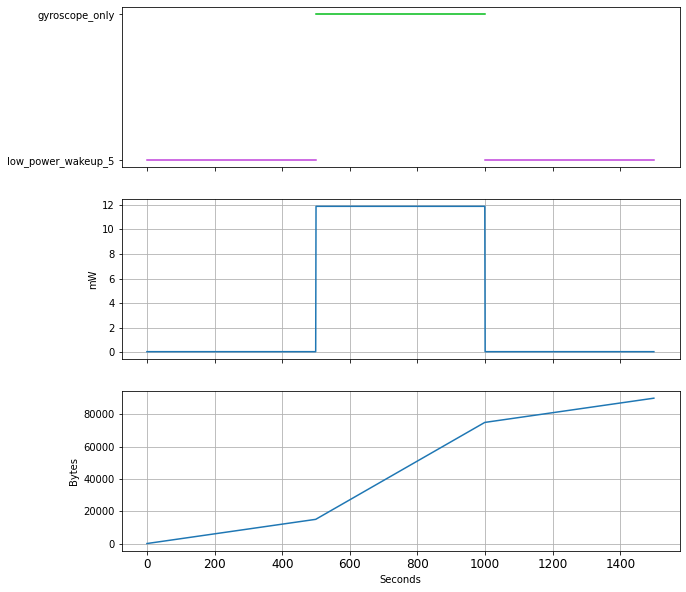

1

In [2]:
active_times = [(0,500,"low_power_wakeup_5"), (500,1000,"gyroscope_only"), (1000,1500,"low_power_wakeup_5")]
accel.runSim(active_times)

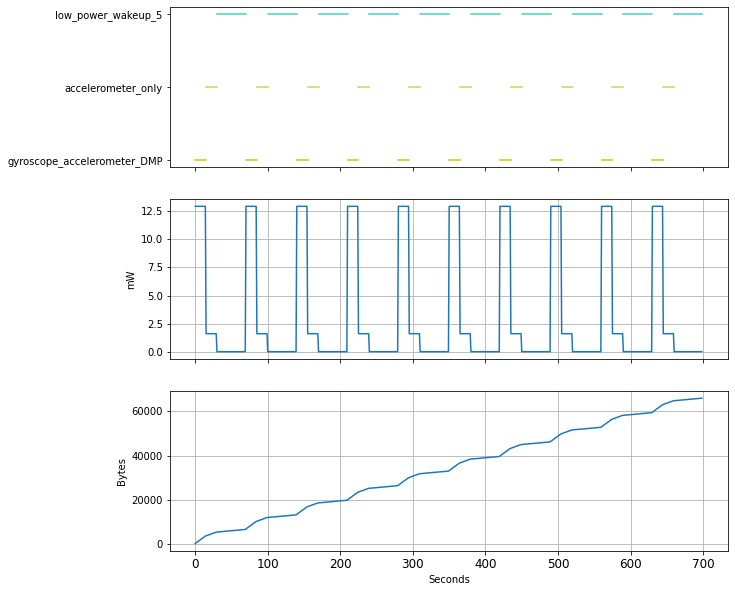

1

In [3]:
def generateActiveList(total_time: float, modedict:dict, **kwargs) -> list:
    #frequency should be in hz. duration should be in seconds
    finalArr = []
    curTime = 0
    flag = False
    while curTime < total_time:
        for key in modedict:
            if curTime+modedict[key]>total_time:
                flag = True
                break
            finalArr.append((curTime, curTime+modedict[key], key))
            curTime += modedict[key]
        if flag: 
            break
    mode = len(finalArr) % len(modedict)
    if finalArr[-1][1] > total_time:
        finalArr[-1] = (finalArr[-1][0], total_time, list(modedict.keys())[mode])
    elif finalArr[-1][1] < total_time:
        finalArr.append((finalArr[-1][1], total_time, list(modedict.keys())[mode]))
    #print(finalArr)
    return finalArr

modedict = {"gyroscope_accelerometer_DMP":15, "accelerometer_only":15,"low_power_wakeup_5":40}
active_times = generateActiveList(total_time=699, modedict=modedict)
accel2 = MPU6050(time_step=1, duration=699, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)

accel2.runSim(active_times)




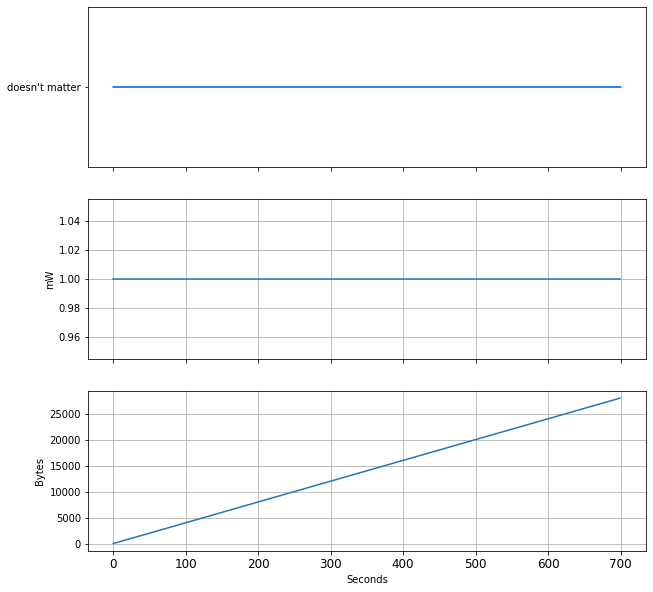

1

In [4]:
capacitive = CAP11NA(loop_rate=20, duration=700, time_step=1)
active_time_list = generateActiveList(total_time=700,modedict={"doesn't matter":1})
capacitive.runSim(active_time_list)

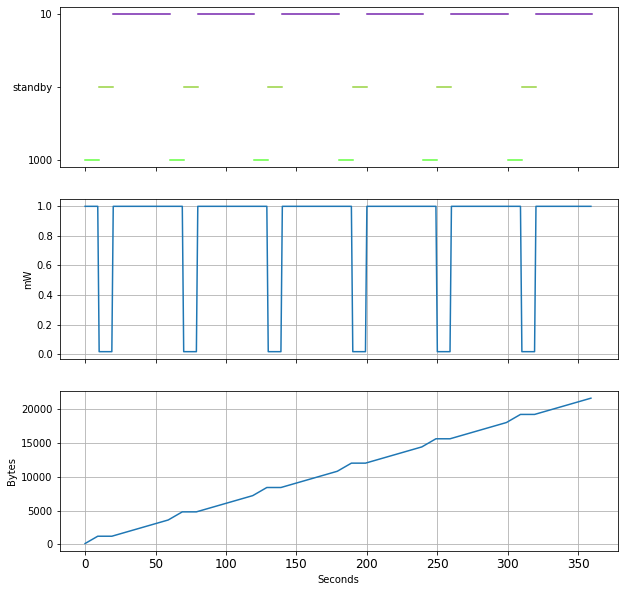

1

In [7]:
foo = BM1422(loop_rate=20, duration=360, time_step=1)
#for magnetometer, the certain mode is the timing specification, or standby.
modedict = {"1000":10, "standby":10,"10":40}
mag_activetimes = generateActiveList(total_time=360, modedict=modedict)
foo.runSim(mag_activetimes)